# 안녕하세요^^
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# (실습준비) 데이터 불러오기부터

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.4 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 학습/평가 데이터 로딩
import pandas as pd
import seaborn as sns

In [ ]:
df_train_x = pd.read_csv('/content/drive/MyDrive/2023.10.12_미니프로젝트4차_데이터/train_x.csv')
df_train_y = pd.read_csv('/content/drive/MyDrive/2023.10.12_미니프로젝트4차_데이터/train_y.csv')
df_test_x = pd.read_csv('/content/drive/MyDrive/2023.10.12_미니프로젝트4차_데이터/test_x.csv')
df_test_y = pd.read_csv('/content/drive/MyDrive/2023.10.12_미니프로젝트4차_데이터/test_y.csv')

In [ ]:
# 글자 깨짐 방지
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

---

# 1. Machine Learning
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

In [ ]:
import numpy as np
train_y = np.array(df_train_y).reshape(-1)
test_y = np.array(df_test_y).reshape(-1)

In [ ]:
train_x = df_train_x.values
test_x = df_test_x.values

### 가. LinearRegression 부터 시작해봅시다.

In [ ]:
model_performance = {}

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [ ]:
# 아래에 실습코드를 작성하세요.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# 아래에 실습코드를 작성하세요.
model_lr = LinearRegression()
model_lr.fit(train_x, train_y)

LinearRegression()

In [ ]:
# 아래에 실습코드를 작성하세요.
y_pred_lr = model_lr.predict(test_x)

In [ ]:
print('R2 Score :', r2_score(test_y, y_pred_lr))
print('RMSE :', np.sqrt(mean_squared_error(test_y, y_pred_lr)))
model_performance['LinearRegression'] = [r2_score(test_y, y_pred_lr), np.sqrt(mean_squared_error(test_y, y_pred_lr))]

R2 Score : 0.7699441681364265
RMSE : 1712.1352817384623


In [ ]:
model_performance

{'LinearRegression': [0.7699441681364265, 1712.1352817384623]}

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [ ]:
# 아래에 실습코드를 작성하세요.
model_rfr = RFR()
model_rfr.fit(train_x,train_y)
y_pred_rfr = model_rfr.predict(test_x)

In [ ]:
# 아래에 실습코드를 작성하세요.
print('R2 Score :', r2_score(test_y, y_pred_rfr))
print('RMSE :', np.sqrt(mean_squared_error(test_y, y_pred_rfr)))
model_performance['RandomForestRegressor'] = [r2_score(test_y, y_pred_rfr), np.sqrt(mean_squared_error(test_y, y_pred_rfr))]

R2 Score : 0.7572489679071608
RMSE : 1758.7414365359643


#### [실습문제3] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [ ]:
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,3))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

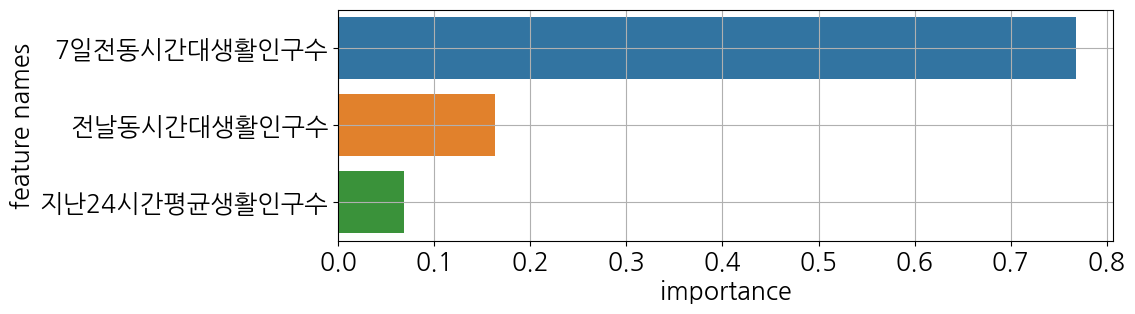

In [ ]:
# Feature의 중요도 확인
result = plot_feature_importance(model_rfr.feature_importances_, list(df_train_x))

In [ ]:
import random
nums = random.choices(range(1, len(train_x)+1), k=500)

In [ ]:
# SHAP 값으로 모델의 예측 설명하기
explainer1 = shap.TreeExplainer(model_rfr)
shap_values1 = explainer1.shap_values(train_x[nums])

In [ ]:
pd.DataFrame(shap_values1, columns = list(df_train_x))

In [ ]:
explainer1.expected_value

In [ ]:
df_train_x.iloc[[3, 5], :]

In [ ]:
shap.initjs() # javascript 시각화 라이브러리 --> colab에서는 모든 셀에 포함시켜야 함.

# force_plot(전체평균, shapley_values, input)
shap.force_plot(explainer1.expected_value, shap_values1[0, :], df_train_x.iloc[[nums[0]],:])

In [ ]:
# 확인할 수 있는 인사이트
# 1. 7일 전의 동시간 생활 인구수가 현재 생활 인구수에 가장 큰 영향을 미친다.
# 2. feature importance를 통해서도 알 수 있으며, (가장 높음)
# 3. shapley value를 통해서도 함께 알 수 있다. (가장 길이가 김)

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# 아래에 실습코드를 작성하세요.
model_gbr = GradientBoostingRegressor()
model_gbr.fit(train_x,train_y)
y_pred_gbr = model_gbr.predict(test_x)

In [ ]:
# 아래에 실습코드를 작성하세요.
print('R2 Score :', r2_score(test_y, y_pred_gbr))
print('RMSE :', np.sqrt(mean_squared_error(test_y, y_pred_gbr)))
model_performance['GradientBoostingRegressor'] = [r2_score(test_y, y_pred_gbr), np.sqrt(mean_squared_error(test_y, y_pred_gbr))]

R2 Score : 0.7786330070705565
RMSE : 1679.4917935678109


#### [실습문제5] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [ ]:
# Feature의 중요도 확인
result = plot_feature_importance(model_gbr.feature_importances_, list(df_train_x))

In [ ]:
# SHAP 값으로 모델의 예측 설명하기
explainer2 = shap.TreeExplainer(model_gbr)
shap_values2 = explainer2.shap_values(train_x[nums])

In [ ]:
explainer2.expected_value

In [ ]:
shap.initjs() # javascript 시각화 라이브러리 --> colab에서는 모든 셀에 포함시켜야 함.

# force_plot(전체평균, shapley_values, input)
shap.force_plot(explainer2.expected_value, shap_values2[400, :], df_train_x.iloc[[nums[400]],:])

In [ ]:
# 확인할 수 있는 인사이트
# 1. 어떤 데이터에 대해서는 7일 전 동시간 대 생활 인구수 보다 전날 동시간대 생활 인구수에 더 큰 영향을 미치는 것을 알 수 있다.
# 2. 전처리 과정에서 변수 별 상관관계 분석 결과 다중 공선성이 발생했을 것으로 생각이 된다.
# 3. PFI에서는 분명 7일전 동시간대 생활인구수의 변수 중요도가 가장 높게 발생하였는데, shapley value를 보면 어떤 데이터에 대해서는 예측값에 다른 요인이 더 많은 영향을 미친 것을 알 수 있습니다.

#### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제6] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# 아래에 실습코드를 작성하세요.
param_grid = [{'learning_rate':[0.01, 0.05, 0.1, 0.5, 1.0], 'max_depth':[3, 5, 7, 10]}]
gs = GridSearchCV(estimator=model_gbr, param_grid=param_grid, cv=2)
gs = gs.fit(train_x, train_y)

print(gs.best_params_)

{'learning_rate': 0.05, 'max_depth': 5}


In [ ]:
# 아래에 실습코드를 작성하세요.
model_gbr = GradientBoostingRegressor(learning_rate=0.05, max_depth=5)
model_gbr.fit(train_x,train_y)
y_pred_gbr = model_gbr.predict(test_x)

In [ ]:
# 아래에 실습코드를 작성하세요.
print('R2 Score :', r2_score(test_y, y_pred_gbr))
print('RMSE :', np.sqrt(mean_squared_error(test_y, y_pred_gbr)))
model_performance['GBR_GridSearch'] = [r2_score(test_y, y_pred_gbr), np.sqrt(mean_squared_error(test_y, y_pred_gbr))]

R2 Score : 0.7793143761807323
RMSE : 1676.9050579532898


#### [실습문제7] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [ ]:
# Feature의 중요도 확인
result = plot_feature_importance(model_gbr.feature_importances_, list(df_train_x))

In [ ]:
# SHAP 값으로 모델의 예측 설명하기
explainer3 = shap.TreeExplainer(model_gbr)
shap_values3 = explainer3.shap_values(train_x[nums])

In [ ]:
shap.initjs() # javascript 시각화 라이브러리 --> colab에서는 모든 셀에 포함시켜야 함.

# force_plot(전체평균, shapley_values, input)
shap.force_plot(explainer3.expected_value, shap_values3[222, :], df_train_x.iloc[[nums[222]],:])

In [ ]:
# 확인할 수 있는 인사이트
# 1. 그리드 서치 방법을 사용하여, GradientBoosting 한 결과 정확도도 살짝 올라갔으며, shapley value가 이전 케이스보다 예상한 대로의 결과가 나온 것 같습니다.
# 2. 7일전 동시간대 생활인구수의 중요도가 가장 많이 작용한 케이스를 볼 수 있습니다.

#### [실습문제8] 스케일링
* Min Max Scale 함수를 활용하여 스케일링 후 위 모델에 적용하여 보세요.


In [ ]:
# 아래에 실습코드를 작성하세요.
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x_std = scaler.transform(train_x)
test_x_std = scaler.transform(test_x)

In [ ]:
# 아래에 실습코드를 작성하세요.
model_lr = LinearRegression()
model_lr.fit(train_x_std, train_y)
y_pred_lr = model_lr.predict(test_x_std)
print('R2 Score :', r2_score(test_y, y_pred_lr))
print('RMSE :', np.sqrt(mean_squared_error(test_y, y_pred_lr)))
model_performance['LinearRegression_std'] = [r2_score(test_y, y_pred_lr), np.sqrt(mean_squared_error(test_y, y_pred_lr))]

R2 Score : 0.7699441681364265
RMSE : 1712.1352817384623


In [ ]:
model_rfr = RFR()
model_rfr.fit(train_x_std,train_y)
y_pred_rfr = model_rfr.predict(test_x_std)
print('R2 Score :', r2_score(test_y, y_pred_rfr))
print('RMSE :', np.sqrt(mean_squared_error(test_y, y_pred_rfr)))
model_performance['RandomForestRegression_std'] = [r2_score(test_y, y_pred_rfr), np.sqrt(mean_squared_error(test_y, y_pred_rfr))]

R2 Score : 0.7533710639684291
RMSE : 1772.7335660665235


In [ ]:
# Feature의 중요도 확인
result = plot_feature_importance(model_rfr.feature_importances_, list(df_train_x))

In [ ]:
# SHAP 값으로 모델의 예측 설명하기
explainer4 = shap.TreeExplainer(model_rfr)
shap_values4 = explainer1.shap_values(train_x_std[nums])

shap.initjs() # javascript 시각화 라이브러리 --> colab에서는 모든 셀에 포함시켜야 함.
# force_plot(전체평균, shapley_values, input)
shap.force_plot(explainer4.expected_value, shap_values4[111, :], df_train_x.iloc[nums[111],:])

In [ ]:
model_gbr = GradientBoostingRegressor()
model_gbr.fit(train_x_std,train_y)
y_pred_gbr = model_gbr.predict(test_x_std)
print('R2 Score :', r2_score(test_y, y_pred_gbr))
print('RMSE :', np.sqrt(mean_squared_error(test_y, y_pred_gbr)))
model_performance['GradientBoostingRegressor_std'] = [r2_score(test_y, y_pred_gbr), np.sqrt(mean_squared_error(test_y, y_pred_gbr))]

R2 Score : 0.7786437597128821
RMSE : 1679.4510033993904


In [ ]:
explainer5 = shap.TreeExplainer(model_gbr)
shap_values5 = explainer5.shap_values(train_x[nums])
shap.initjs() # javascript 시각화 라이브러리 --> colab에서는 모든 셀에 포함시켜야 함.
# force_plot(전체평균, shapley_values, input)
shap.force_plot(explainer5.expected_value, shap_values5[111, :], df_train_x.iloc[nums[111],:])
model_performance['LinearRegression'] = [r2_score(test_y, y_pred_lr), np.sqrt(mean_squared_error(test_y, y_pred_lr))]

In [ ]:
model_gbr = GradientBoostingRegressor()

In [ ]:
param_grid = [{'learning_rate':[0.01, 0.05, 0.1, 0.5, 1.0], 'max_depth':[3, 5, 7, 10]}]
gs = GridSearchCV(estimator=model_gbr, param_grid=param_grid, cv=2)
gs = gs.fit(train_x_std, train_y)

print(gs.best_params_)

KeyboardInterrupt: ignored

In [ ]:
model_gbr = GradientBoostingRegressor(learning_rate=0.05, max_depth=5)
model_gbr.fit(train_x_std,train_y)
y_pred_gbr = model_gbr.predict(test_x_std)
print('R2 Score :', r2_score(test_y, y_pred_gbr))
print('RMSE :', np.sqrt(mean_squared_error(test_y, y_pred_gbr)))
model_performance['GBR_GridSearch_std'] = [r2_score(test_y, y_pred_gbr), np.sqrt(mean_squared_error(test_y, y_pred_gbr))]

R2 Score : 0.7818526140370591
RMSE : 1667.2336223487578


In [ ]:
result = plot_feature_importance(model_gbr.feature_importances_, list(df_train_x))

In [ ]:
explainer6 = shap.TreeExplainer(model_gbr)
shap_values6 = explainer6.shap_values(train_x_std[nums])

shap.initjs() # javascript 시각화 라이브러리 --> colab에서는 모든 셀에 포함시켜야 함.

# force_plot(전체평균, shapley_values, input)
shap.force_plot(explainer6.expected_value, shap_values6[444, :], df_train_x.iloc[[nums[444]],:])

In [ ]:
model_performance = pd.DataFrame(model_performance).T
model_performance.columns = ['r2_score', 'RMSE']

In [ ]:
model_performance.sort_values(by='r2_score', ascending=False)

,r2_score,RMSE
GBR_GridSearch_std,0.781853,1667.233622
GBR_GridSearch,0.779314,1676.905058
GradientBoostingRegressor_std,0.778644,1679.451003
GradientBoostingRegressor,0.778633,1679.491794
LinearRegression,0.769944,1712.135282
LinearRegression_std,0.769944,1712.135282
RandomForestRegressor,0.757249,1758.741437
RandomForestRegression_std,0.753371,1772.733566


In [ ]:
model_performance = model_performance.reset_index()
model_performance.columns = ['model', 'r2_score', 'RMSE']

In [ ]:
model_performance

,model,r2_score,RMSE
0,LinearRegression,0.769944,1712.135282
1,RandomForestRegressor,0.757249,1758.741437
2,GradientBoostingRegressor,0.778633,1679.491794
3,GBR_GridSearch,0.779314,1676.905058
4,LinearRegression_std,0.769944,1712.135282
5,RandomForestRegression_std,0.753371,1772.733566
6,GradientBoostingRegressor_std,0.778644,1679.451003
7,GBR_GridSearch_std,0.781853,1667.233622


In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x='r2_score', y='model', data=model_performance.sort_values(by='r2_score', ascending=False))
plt.xlabel('r2_score')
plt.ylabel('model')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x='RMSE', y='model', data=model_performance.sort_values(by='RMSE'))
plt.xlabel('RMSE')
plt.ylabel('model')
plt.grid()
plt.show()

---

# 2. Deep Learning
## 이번엔 딥러닝 모델링을 해봅시다.

#### [실습문제9] 딥러닝

* tensorflow 라이브러리를 활용한 모델을 자유롭게 만들어보세요.

In [ ]:
# 아래에 실습코드를 작성하세요.
import tensorflow as tf

In [ ]:
X = tf.keras.Input(shape=[3])
Y = tf.keras.layers.Dense(1)(X)
model_1 = tf.keras.Model(X, Y)
model_1.compile(loss='mse')
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_performance2 = {}

In [ ]:
early = tf.keras.callbacks.EarlyStopping(patience = 20, restore_best_weights=True)
model_1.fit(train_x, train_y, epochs = 1000, validation_split = 0.2, batch_size = 32, callbacks = [early])
y_pred1 = model_1.predict(test_x)
print('R2 Score :', r2_score(test_y, y_pred1))
print('RMSE :', np.sqrt(mean_squared_error(test_y, y_pred1)))
model_performance2['DL_1layer'] = [r2_score(test_y, y_pred1), np.sqrt(mean_squared_error(test_y, y_pred1))]

Epoch 1/1000
1084/1084 [==============================] - 2s 2ms/step - loss: 2449947.7500 - val_loss: 894778.1250
Epoch 2/1000
1084/1084 [==============================] - 2s 2ms/step - loss: 2446108.2500 - val_loss: 991945.2500
Epoch 3/1000
1084/1084 [==============================] - 2s 2ms/step - loss: 2442162.5000 - val_loss: 897509.6250
Epoch 4/1000
1084/1084 [==============================] - 3s 3ms/step - loss: 2438467.7500 - val_loss: 896491.2500
Epoch 5/1000
1084/1084 [==============================] - 4s 4ms/step - loss: 2438397.2500 - val_loss: 914030.8125
Epoch 6/1000
1084/1084 [==============================] - 5s 5ms/step - loss: 2438420.7500 - val_loss: 938409.5625
Epoch 7/1000
1084/1084 [==============================] - 2s 2ms/step - loss: 2438024.7500 - val_loss: 902990.3125
Epoch 8/1000
1084/1084 [==============================] - 3s 3ms/step - loss: 2438231.7500 - val_loss: 952029.9375
Epoch 9/1000
1084/1084 [==============================] - 3s 3ms/step - loss: 24

In [ ]:
X = tf.keras.Input(shape = [3])
H = tf.keras.layers.Dense(2)(X)
H = tf.keras.layers.Dense(2)(X)
Y = tf.keras.layers.Dense(1)(H)
model2 = tf.keras.Model(X, Y)
model2.compile(loss = 'mse')
early = tf.keras.callbacks.EarlyStopping(patience = 20, restore_best_weights=True)
model2.fit(train_x, train_y, epochs = 1000, validation_split = 0.2, batch_size = 32, callbacks = [early])
y_pred2 = model2.predict(test_x)
print('R2 Score :', r2_score(test_y, y_pred2))
print('RMSE :', np.sqrt(mean_squared_error(test_y, y_pred2)))
model_performance2['DL_3layer'] = [r2_score(test_y, y_pred2), np.sqrt(mean_squared_error(test_y, y_pred2))]

Epoch 1/1000
1084/1084 [==============================] - 7s 5ms/step - loss: 12187525.0000 - val_loss: 1267043.7500
Epoch 2/1000
1084/1084 [==============================] - 3s 3ms/step - loss: 2845313.5000 - val_loss: 1132673.8750
Epoch 3/1000
1084/1084 [==============================] - 3s 3ms/step - loss: 2653464.5000 - val_loss: 1030420.1875
Epoch 4/1000
1084/1084 [==============================] - 3s 2ms/step - loss: 2558631.7500 - val_loss: 979764.9375
Epoch 5/1000
1084/1084 [==============================] - 2s 2ms/step - loss: 2509428.7500 - val_loss: 1196095.6250
Epoch 6/1000
1084/1084 [==============================] - 3s 3ms/step - loss: 2482675.7500 - val_loss: 945934.6875
Epoch 7/1000
1084/1084 [==============================] - 2s 2ms/step - loss: 2468394.7500 - val_loss: 940719.3750
Epoch 8/1000
1084/1084 [==============================] - 3s 3ms/step - loss: 2458255.5000 - val_loss: 917503.6875
Epoch 9/1000
1084/1084 [==============================] - 3s 3ms/step - los

In [ ]:
# 아래에 실습코드를 작성하세요.
model_performance2 = pd.DataFrame(model_performance2).T
model_performance2 = model_performance2.reset_index()
model_performance2.columns = ['model', 'r2_score', 'RMSE']

In [ ]:
model_performance

,model,r2_score,RMSE
0,LinearRegression,0.769944,1712.135282
1,RandomForestRegressor,0.757249,1758.741437
2,GradientBoostingRegressor,0.778633,1679.491794
3,GBR_GridSearch,0.779314,1676.905058
4,LinearRegression_std,0.769944,1712.135282
5,RandomForestRegression_std,0.753371,1772.733566
6,GradientBoostingRegressor_std,0.778644,1679.451003
7,GBR_GridSearch_std,0.781853,1667.233622
0,DL_1layer,0.753901,1770.827105
1,DL_3layer,0.766294,1725.662984


In [ ]:
# 아래에 실습코드를 작성하세요.
model_performance = pd.concat([model_performance, model_performance2], axis=0)

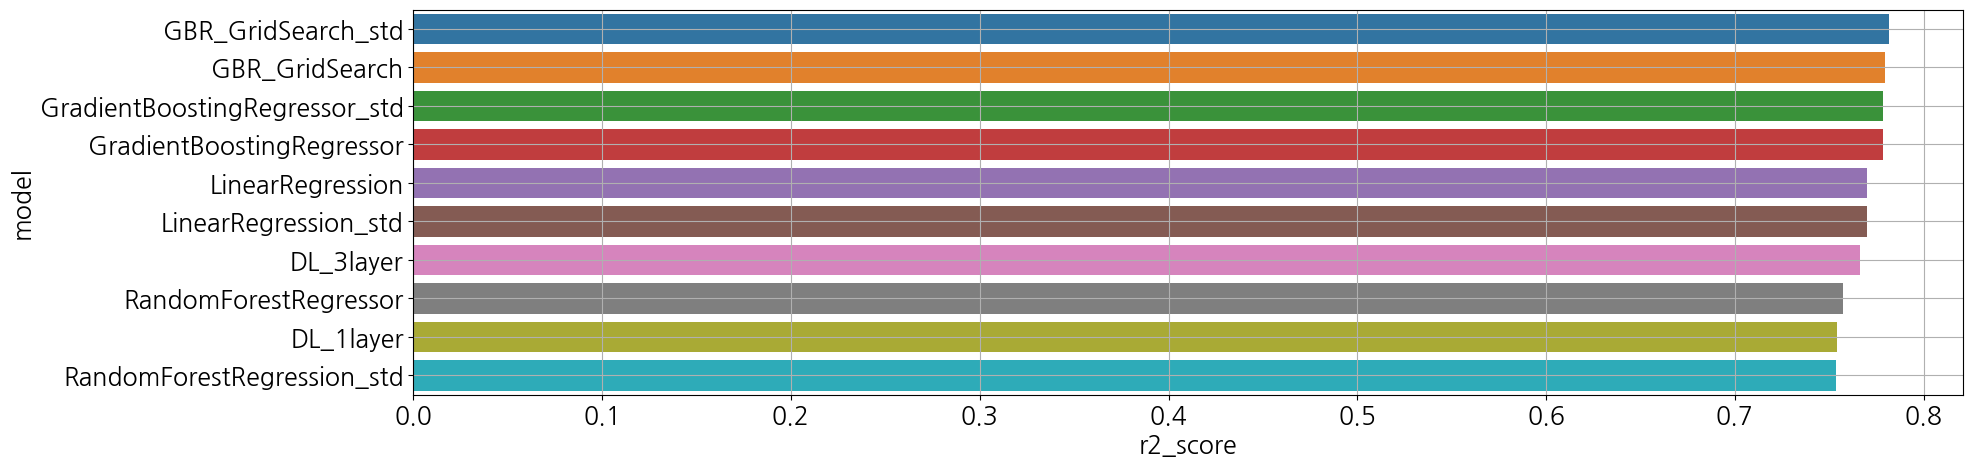

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x='r2_score', y='model', data=model_performance.sort_values(by='r2_score', ascending=False))
plt.xlabel('r2_score')
plt.ylabel('model')
plt.grid()
plt.show()